In [1]:
import pickle as pkl 
import numpy as np 
import matplotlib.pyplot as plt
from qiskit.quantum_info import state_fidelity
import math

from analysis_utils import correct_counts, counts_to_statevector

In [2]:
with open('d1q2_shot_counts.pkl', 'rb') as f:
    counts_all = pkl.load(f)

with open('d1q2_statevectors.pkl', 'rb') as f:
    sv_all = pkl.load(f)

dict_values([np.float64(0.9999716454858268), np.float64(0.9999697460216381), np.float64(0.9999673406229103), np.float64(0.9999715821904875), np.float64(0.9999671288404015), np.float64(0.9999675701709846), np.float64(0.9999666752849293), np.float64(0.9999670589195514), np.float64(0.9999676899953946), np.float64(0.9999669621526401), np.float64(0.9999729124459605), np.float64(0.9999690641462978), np.float64(0.9999656722304868), np.float64(0.999965660914719), np.float64(0.9999669969747118), np.float64(0.999968091202714), np.float64(0.9999693984183498), np.float64(0.9999629094206542), np.float64(0.9999695032449313), np.float64(0.9999683385775545), np.float64(0.9999647744474354), np.float64(0.9999666051825603), np.float64(0.9999687605450728), np.float64(0.9999650125654619), np.float64(0.9999663641486344), np.float64(0.9999630602973815), np.float64(0.9999712190828867), np.float64(0.9999642725260771), np.float64(0.9999680342650549), np.float64(0.9999684270211657), np.float64(0.9999716658757136

Text(0.5, 1.0, 'Fidelity of Finite Sampling using Prepared States By Iteration')

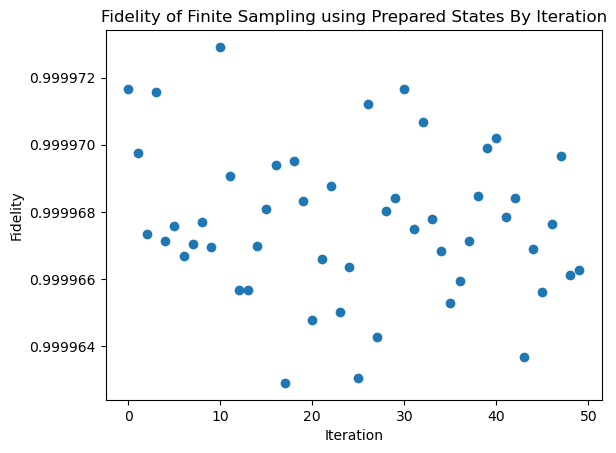

In [22]:
M = 64 # sorry for the hard coding
nrm = 0.8185352771872451 # sorry for the hard coding
def graph(counts_sv, sv, M):

    plt.xlabel("Lattice Site")
    plt.ylabel("Concentration")
    plt.title(f"Concentration at Lattice Sites at t = {i}")

    plt.plot(list(range(0,M,1)), 2**(1)*nrm*np.array(counts_sv)[:M:], label='Finite Sampling')

    plt.plot(list(range(0,M,1)), 2**(1)*nrm*np.array(sv)[:M:], label="State vector")

    plt.legend()
    plt.show()

fidelity_arr = {}

for i in list(counts_all.keys()):
    counts = counts_all[i]

    if len(list(counts.values())) != pow(2, 8):
        counts = correct_counts(counts, 8)   

    counts_sv = counts_to_statevector(counts)
    expected_sv = sv_all[i]

    counts_abs = np.abs(np.array(counts_sv))
    expected_abs = np.abs(np.array(expected_sv))

    fid = counts_abs.dot(expected_abs)
    # print(fid)

    # fid = state_fidelity(counts_sv, expected_sv)

    fidelity_arr[i] = fid
print(fidelity_arr.values())

fig, ax = plt.subplots()
ax.scatter(list(range(50)), list(fidelity_arr.values()))
ax.ticklabel_format(useOffset=False)
plt.xlabel("Iteration")
plt.ylabel("Fidelity")
plt.title(f"Fidelity of Finite Sampling using Prepared States By Iteration")

In [13]:
with open('d1q2_fidelity_per_iteration.pkl', 'wb') as f:
    pkl.dump(fidelity_arr, f)

In [18]:
# graph counts vs number shots
with open('d1q2_sampleincr_counts.pkl', 'rb') as f:
    sampleincr_counts_all = pkl.load(f)

with open('d1q2_sampleincr_statevector.pkl', 'rb') as f:
    sampleincr_sv_all = pkl.load(f)

In [20]:
sampleincr_counts_all

{}

In [19]:
keys = list(sampleincr_counts_all.keys())
print(keys)

fidelity_keys = []
fidelity_values = []

for power, iteration in keys:
    counts = sampleincr_counts_all[(power, iteration)]
    expected_sv = sampleincr_sv_all[(power, iteration)]

    if len(list(counts.values())) != pow(2, 8):
        counts = correct_counts(counts, 8)   

    counts_sv = counts_to_statevector(counts)

    counts_abs = np.abs(np.array(counts_sv))
    expected_abs = np.abs(np.array(expected_sv))

    fid = counts_abs.dot(expected_abs)

    # fid = state_fidelity(counts_sv, expected_sv)

    fidelity_keys.append(power)
    fidelity_values.append(fid)

[]


In [74]:
# take log of the value
for i in range(len(fidelity_values)):
    fidelity_values[i] = math.log10(fidelity_values[i])

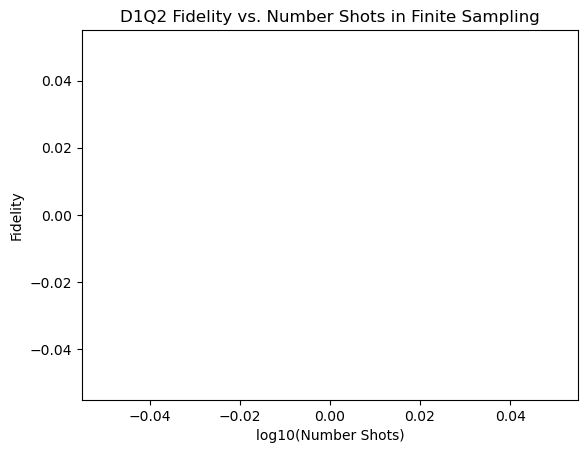

In [21]:
x = fidelity_keys
y = fidelity_values

plt.close('all')
plt.xlabel("log10(Number Shots)")
plt.ylabel("Fidelity")
plt.title(f"D1Q2 Fidelity vs. Number Shots in Finite Sampling")

plt.scatter(x, y)

plt.show()

In [82]:
average_fidelity = []

for power in range(4):
    sum = 0
    for i in range(5):
        sum = sum + fidelity_values[power * 5 + i]
    
    average = sum / 5
    average_fidelity.append(average)

In [85]:
llog_avg_fidelity = []
for i in average_fidelity:
    llog_avg_fidelity.append(math.log10(i))

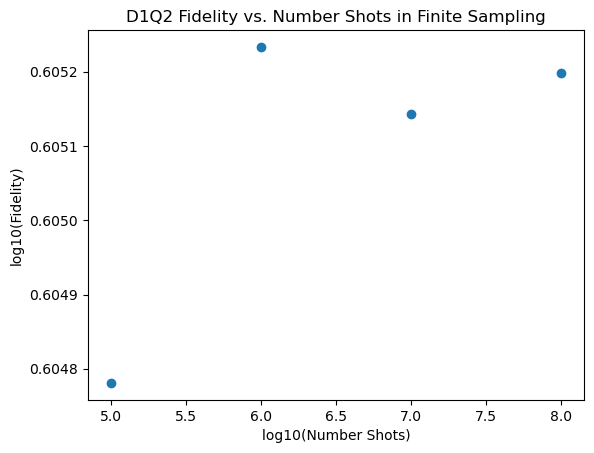

In [88]:
x = [5, 6, 7, 8]
y = average_fidelity

plt.close('all')
plt.xlabel("log10(Number Shots)")
plt.ylabel("log10(Fidelity)")
plt.title(f"D1Q2 Fidelity vs. Number Shots in Finite Sampling")

plt.scatter(x, y)

plt.show()